**Prerequisits**

In [ ]:
%pip install pandas
%pip install jinja2
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install gensim
%pip install gensim
%pip install graphviz
%pip install dtreeviz

**Imports**

In [4]:
import pandas as pd
import numpy as np
import joblib
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

**Loading and cleaning datasets**

In [5]:
file_path = "dataset\\SQL_Dataset.csv"
df = pd.read_csv(file_path)
df= df.dropna()
df=df.drop_duplicates()
display(df.head().style.map(lambda x: 'font-weight: bold;text-align: left;color: red;'))
display(HTML("<hr>"))
df.info()
display(HTML("<hr>"))
df.describe().style.map(lambda x: 'text-align: center;')

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 temporary tablespace temp default tablespace users;,1
2,"AND 1 = utl_inaddr.get_host_address ( ( SELECT DISTINCT ( table_name ) FROM ( SELECT DISTINCT ( table_name ) , ROWNUM AS LIMIT FROM sys.all_tables ) WHERE LIMIT = 5 ) ) AND 'i' = 'i",1
3,"select * from users where id = '1' or @ @1 = 1 union select 1,version ( ) -- 1'",1
4,"select * from users where id = 1 or 1#"" ( union select 1,version ( ) -- 1",1


<class 'pandas.core.frame.DataFrame'>
Index: 30907 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30907 non-null  object
 1   Label   30907 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 724.4+ KB


,Label
count,30907.000000
mean,0.368137
std,0.482307
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Vectorization function**


In [6]:
def get_doc_embedding(doc, model, vector_size):
    words = doc.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if not embeddings:
        return [0] * vector_size 
    return sum(embeddings) / len(embeddings)


**Splitting dataset**

In [7]:
X = df['Query']
y = df['Label']
vec=1000
tokenized_text = [text.split() for text in X]
cbow_model = Word2Vec(sentences=tokenized_text, vector_size=vec, window=5, min_count=1, workers=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(HTML("<h2>X_train (Training Data):</h2>"))
display(X_train.head())
display(HTML("<hr>"))

display(HTML("<h2>X_test (Testing Data):</h2>"))
display(X_test.head())
display(HTML("<hr>"))

display(HTML("<h2>y_train (Training Labels):</h2>"))
display(y_train.head())
display(HTML("<hr>"))

display(HTML("<h2>y_test (Testing Labels):</h2>"))
display(y_test.head())
display(HTML("<hr>"))

X_train =  [get_doc_embedding(doc, cbow_model, vec) for doc in X_train]
X_test = [get_doc_embedding(doc, cbow_model, vec) for doc in X_test]
X_train = pd.DataFrame(X_train).to_numpy()
X_test = pd.DataFrame(X_test).to_numpy()

scaler = MinMaxScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)



11322    -8609%"   )    )     )   union all select 6021...
6926                               -6546"  )   order by 1#
29671    SELECT AVG ( thick )  FROM hall  SELECT SUM ( ...
9403     1"   )    )     )   and   (  7396  =  6351  ) ...
15044                                              sojuela
Name: Query, dtype: object

2154     1"   )    )    and   (  select * from   (  sel...
19684    SELECT * FROM wp_posts WHERE ID  =  28694 LIMIT 1
3877     1'  )   as uqkz where 8482  =  8482 and 8407  ...
13708                                         madan deluca
23058       SELECT * FROM  ( SELECT birds FROM attached ) 
Name: Query, dtype: object

11322    1
6926     1
29671    0
9403     1
15044    0
Name: Label, dtype: int64

2154     1
19684    0
3877     1
13708    0
23058    0
Name: Label, dtype: int64

**Evaluation function**

In [8]:
fpr = dict()
tpr = dict()
roc_auc = dict()
def eval(model,matrix,x_test):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    y_prob = model.predict_proba(x_test)

    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_test == model.classes_[i]).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))

    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], label=f'{model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Supervised Learning

## Multinomial Naïve Bayes

In [9]:
mnb_model = MultinomialNB()
mnb_model.fit( X_train_1, y_train)
joblib.dump(mnb_model, 'models/mnb_model.joblib')

y_pred = mnb_model.predict( X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep)
display(HTML("<hr>Model saved"))

#Accuracy: 0.982368165642187


Accuracy: 0.982368165642187


Confusion Matrix:
[[3867   45]
 [  64 2206]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3912
           1       0.98      0.97      0.98      2270

    accuracy                           0.98      6182
   macro avg       0.98      0.98      0.98      6182
weighted avg       0.98      0.98      0.98      6182



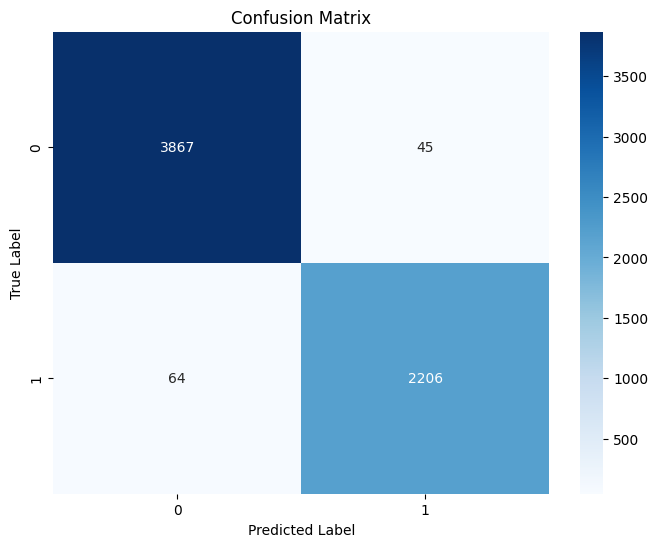

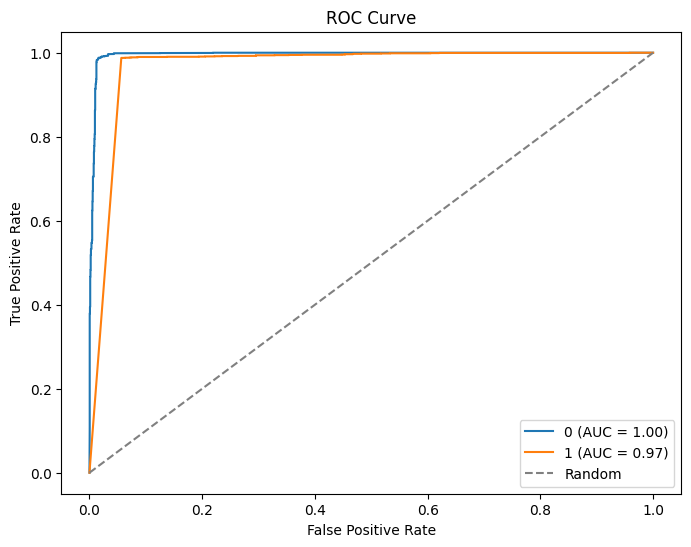

In [10]:
eval(mnb_model,conf_matrix,X_test)

## Bernoulli’s Naïve Bayes

In [11]:
bnb_model = BernoulliNB()

bnb_model.fit(X_train, y_train)
y_pred  = bnb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred )
conf_matrix  = confusion_matrix(y_test, y_pred )
classification_rep  = classification_report(y_test, y_pred )
joblib.dump(bnb_model , 'models/bnb_model.joblib')

print(f"Accuracy: {accuracy }")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix )
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep )
display(HTML("<hr>Model saved"))

Accuracy: 0.9792947266256875


Confusion Matrix:
[[3828   84]
 [  44 2226]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3912
           1       0.96      0.98      0.97      2270

    accuracy                           0.98      6182
   macro avg       0.98      0.98      0.98      6182
weighted avg       0.98      0.98      0.98      6182



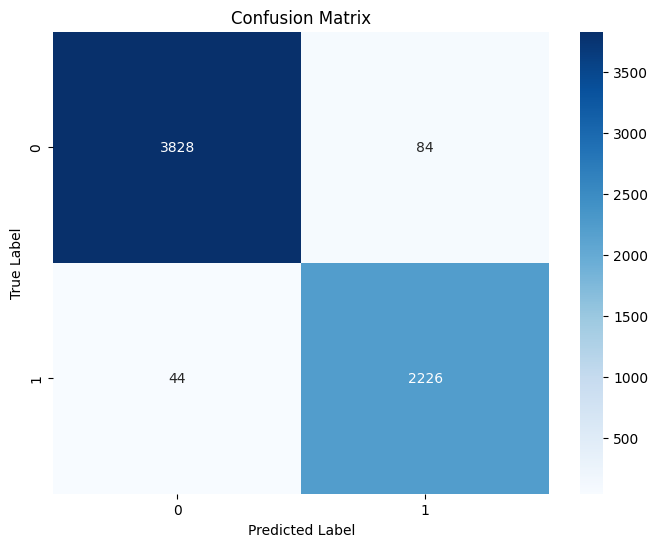

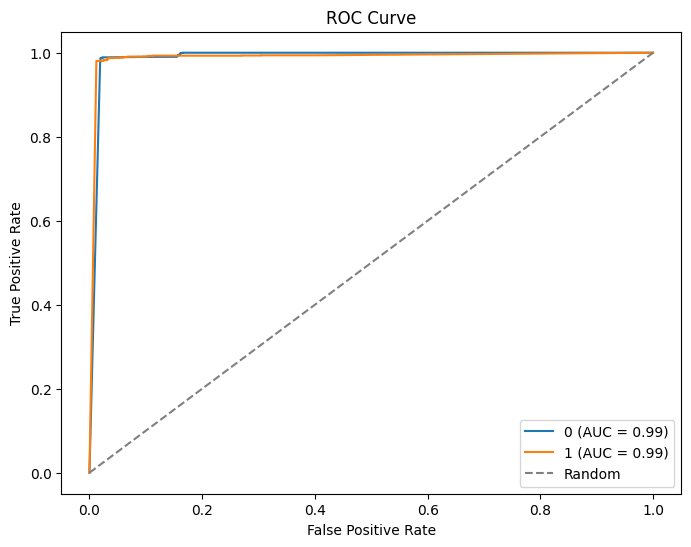

In [12]:
eval(bnb_model,conf_matrix,X_test)

##  Gaussian Naïve Bayes

In [13]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_1, y_train)
y_pred_word2vec = gnb_model.predict(X_test_1)
joblib.dump(gnb_model, 'models/gnb_model.joblib')


accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
conf_matrix = confusion_matrix(y_test, y_pred_word2vec)
classification_rep = classification_report(y_test, y_pred_word2vec)

# Display the results
print(f"Accuracy: {accuracy_word2vec}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep)
display(HTML("<hr>Model saved"))


Accuracy: 0.9890003235198964


Confusion Matrix:
[[3883   29]
 [  39 2231]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3912
           1       0.99      0.98      0.98      2270

    accuracy                           0.99      6182
   macro avg       0.99      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



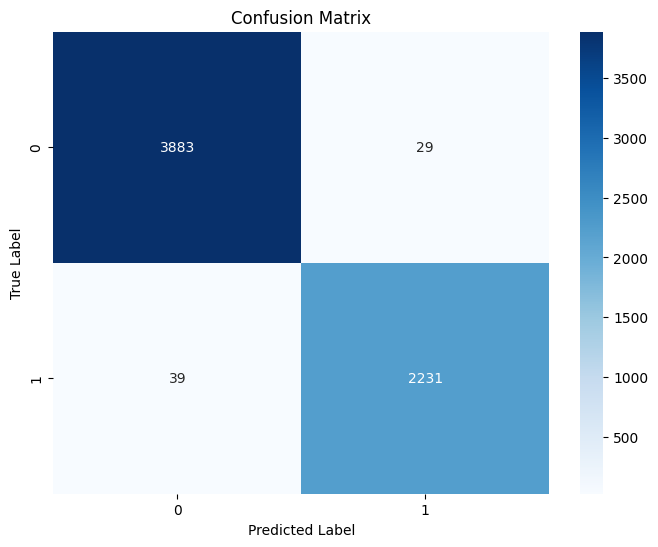

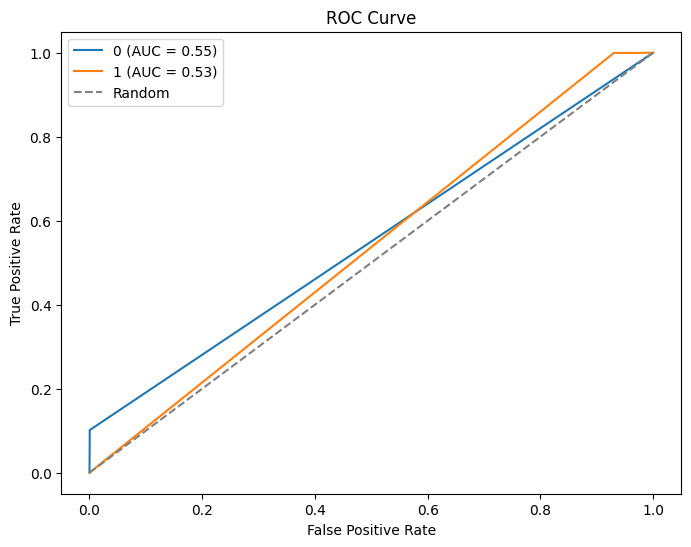

In [14]:
eval(gnb_model,conf_matrix,X_test)

## SVM RBF 

In [15]:
svm_rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True) 
svm_rbf_model.fit(X_train_1, y_train)

y_pred_svm_rbf = svm_rbf_model.predict(X_test_1)
joblib.dump(svm_rbf_model, 'models/svm_rbf_model.joblib')

accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
classification_rep_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

print(f"Accuracy with SVM RBF: {accuracy_svm_rbf}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix_svm_rbf)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep_svm_rbf)
display(HTML("<hr>Model saved"))

Accuracy with SVM RBF: 0.9945001617599483


Confusion Matrix:
[[3909    3]
 [  31 2239]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3912
           1       1.00      0.99      0.99      2270

    accuracy                           0.99      6182
   macro avg       1.00      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



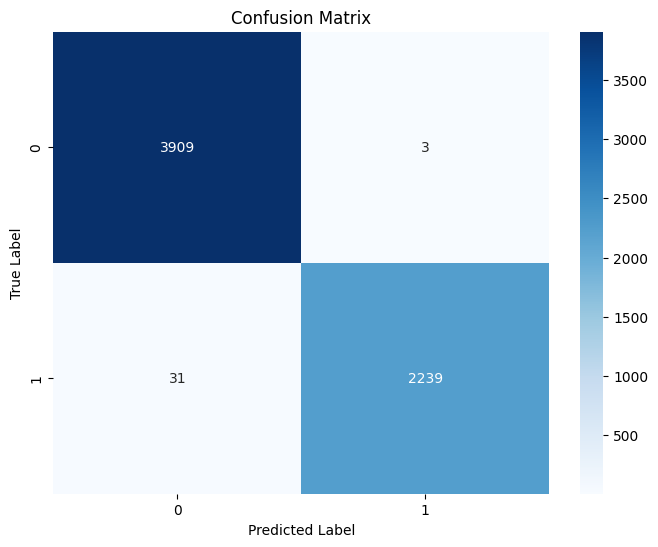

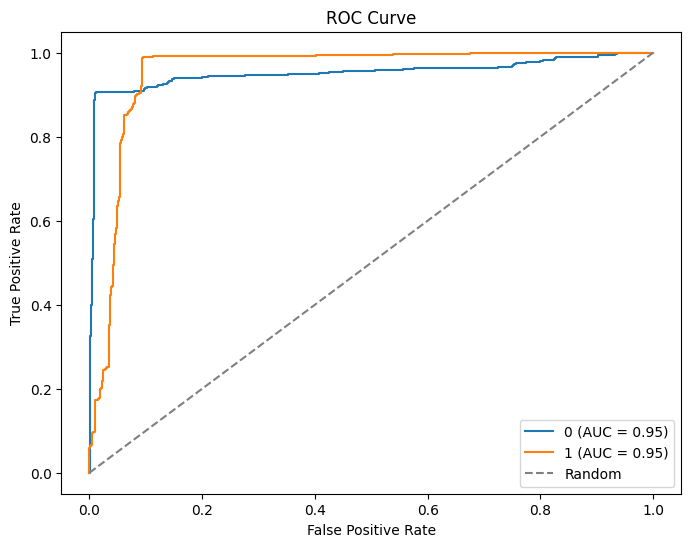

In [16]:
eval(svm_rbf_model,conf_matrix_svm_rbf,X_test)

## Logistic Regression

In [23]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_1, y_train)
joblib.dump(logreg_model, 'models/log_reg_model.joblib')

y_pred_logreg = logreg_model.predict(X_test_1)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
 
print(f"Accuracy with Logistic Regression: {accuracy_logreg}")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("Classification Report:")
print(classification_rep_logreg)

Accuracy with Logistic Regression: 0.9941766418634747
Confusion Matrix:
[[3910    2]
 [  34 2236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3912
           1       1.00      0.99      0.99      2270

    accuracy                           0.99      6182
   macro avg       1.00      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



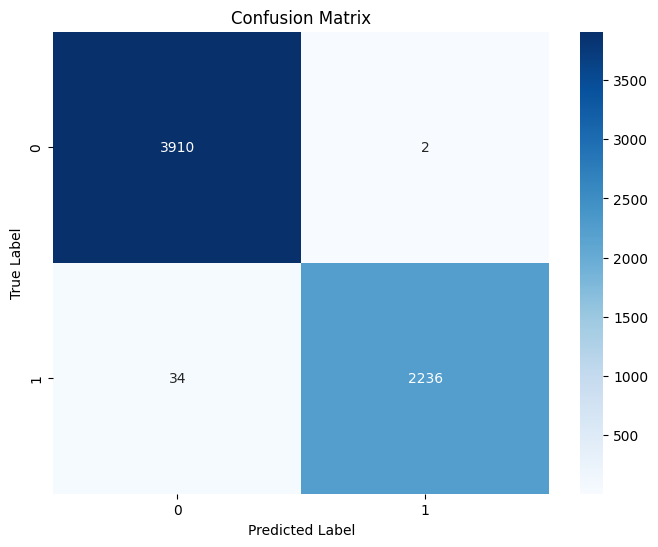

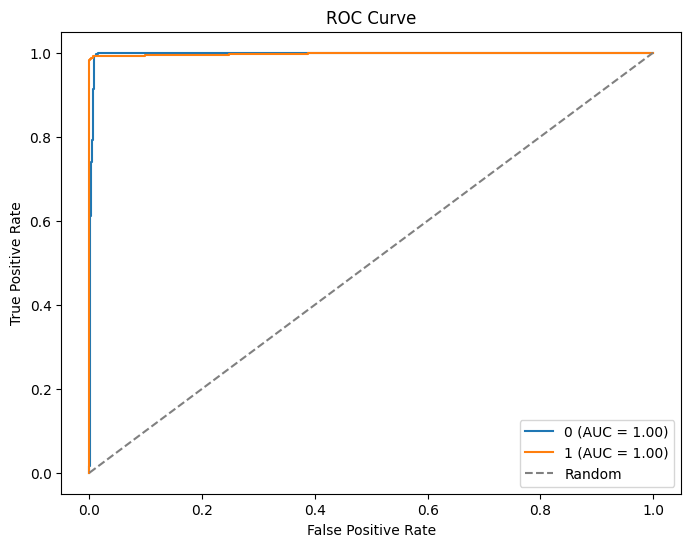

In [18]:
eval(logreg_model,conf_matrix_logreg,X_test_1)


## Decision tree

In [19]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model.fit(X_train_1, y_train)
joblib.dump(dt_model, 'models/dt_model.joblib')

y_pred_dt = dt_model.predict(X_test_1)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy with Decision Tree: {accuracy_dt}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix_dt)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep_dt)
display(HTML("<hr>Model saved"))

Accuracy with Decision Tree: 0.9945001617599483


Confusion Matrix:
[[3900   12]
 [  22 2248]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3912
           1       0.99      0.99      0.99      2270

    accuracy                           0.99      6182
   macro avg       0.99      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



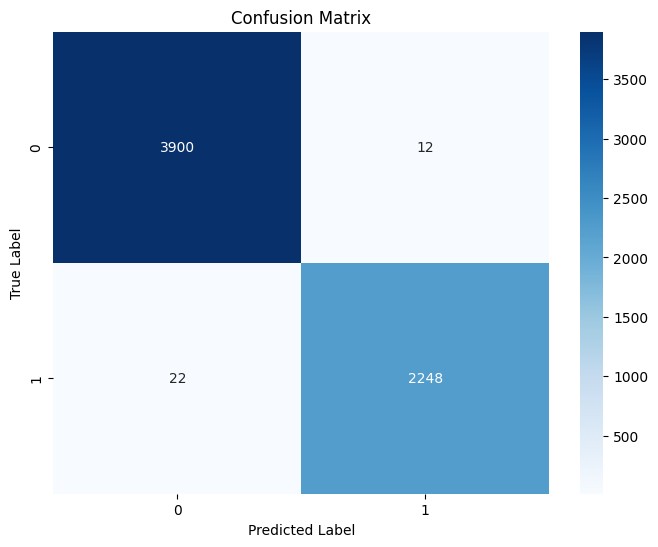

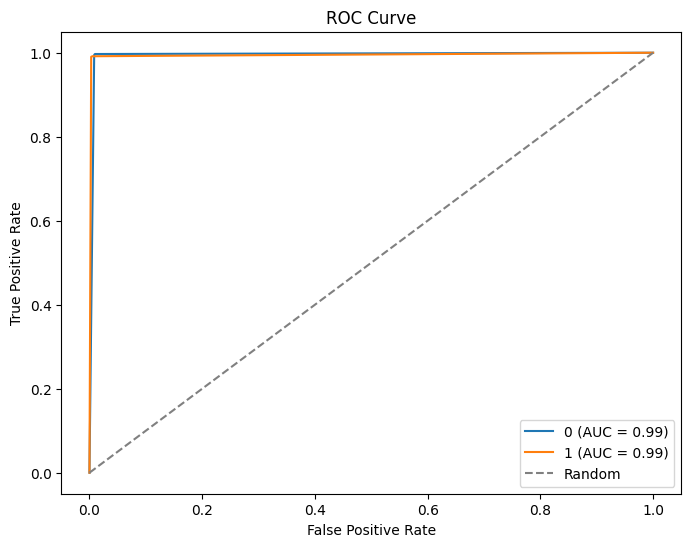

In [20]:
eval(dt_model,conf_matrix_dt,X_test_1)

# plt.figure(figsize=(120,400))
# tree.plot_tree(dt_model,rounded=True, fontsize=50)
# plt.show()



## Random forest

In [21]:
forest_model = RandomForestClassifier(n_estimators=10, random_state=5)
forest_model.fit(X_train_1, y_train)

joblib.dump(forest_model, 'models/forest_model.joblib')

y_pred = dt_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep)
display(HTML("<hr>Model saved"))

Accuracy: 0.9945001617599483


Confusion Matrix:
[[3900   12]
 [  22 2248]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3912
           1       0.99      0.99      0.99      2270

    accuracy                           0.99      6182
   macro avg       0.99      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



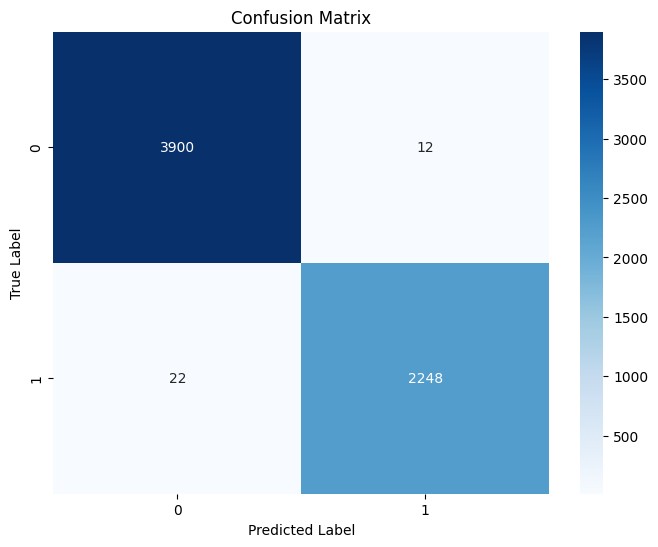

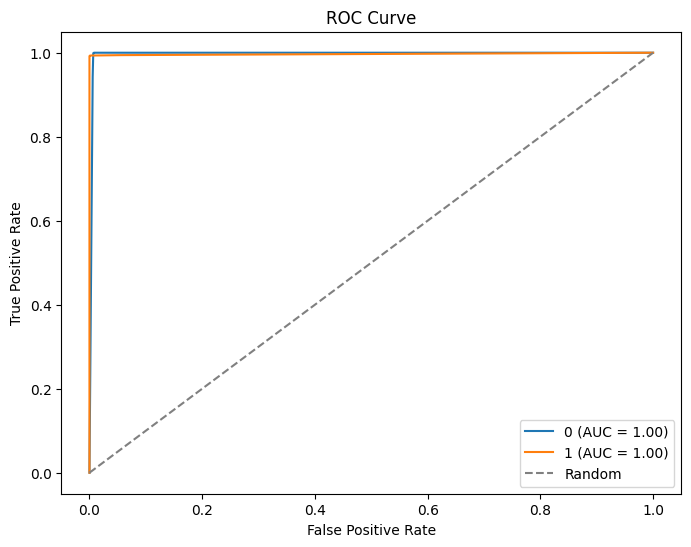

In [22]:
eval(forest_model,conf_matrix,X_test_1)

#fig, axes = plt.subplots((10 + 2) // 3, 3, figsize=(15, 30))
# for i, ax in enumerate(axes.flatten()):
#     if i < 10:
#         tree.plot_tree(forest_model.estimators_[i], rounded=True, filled=True, fontsize=8, ax=ax)

# plt.tight_layout()
# plt.show()

## AdaBoost